<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

# Problem Set 02

Welcome to your second assignment. This exercise gives you a brief introduction to Python. 


STUDENT NAME: Aminreza Mohammadi

STUDENT ID: 99102191

## Import 
>Put all of your imports for this file in the below cell.

In [10]:
### START CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### END CODE HERE ###

# Question 1

## Array creation
>Create the followings to numpy array:
* A: a 3\*3 array like this:
$$
A = \left(\begin{array}{cc} 
10 & 20 & 30\\
5 & 10 & 15\\
1 & 5 & 8
\end{array}\right)
$$ 
* B: a 3\*3\*4 that filled with the numbers start from 15 and have steps of 5 to the end. The array should be filled first along the first dimension then the second dimension and at last the third dimension. like this:
$$
B[:, :, 0] = \left(\begin{array}{cc} 
15 & 30 & 45\\
20 & 35 & 50\\
25 & 40 & 55
\end{array}\right)
$$ 

In [2]:
### START CODE HERE ###
A = np.ones((3,3))
for i in range(1,4):
    A[0,i-1] *= 10*i
    A[1,i-1] *= 5*i  
A[2,1] = 5
A[2,2] = 8
print(A)

B = np.ones((3,3,4))
for i in range(4):
    for j in range(3):
        for x in range(3):
            B[j,x,i] = 45*(i) + 15*(x+1) + 5*j
print(B[:,:,0])
print(B[:,:,1])
print(B[:,:,2])
print(B[:,:,3])
        
### END CODE HERE ###

[[10. 20. 30.]
 [ 5. 10. 15.]
 [ 1.  5.  8.]]
[[15. 30. 45.]
 [20. 35. 50.]
 [25. 40. 55.]]
[[ 60.  75.  90.]
 [ 65.  80.  95.]
 [ 70.  85. 100.]]
[[105. 120. 135.]
 [110. 125. 140.]
 [115. 130. 145.]]
[[150. 165. 180.]
 [155. 170. 185.]
 [160. 175. 190.]]


## Replacement
>Replace the last slice of array B (B[:, :, 3]) with values of A. Then print the result.

In [3]:
### START CODE HERE ###
B[:,:,3] = A 
print(B)
### END CODE HERE ###

[[[ 15.  60. 105.  10.]
  [ 30.  75. 120.  20.]
  [ 45.  90. 135.  30.]]

 [[ 20.  65. 110.   5.]
  [ 35.  80. 125.  10.]
  [ 50.  95. 140.  15.]]

 [[ 25.  70. 115.   1.]
  [ 40.  85. 130.   5.]
  [ 55. 100. 145.   8.]]]


## Axis Swap 
>Swap the first(B[:, :, 0]) and last(B[:, :, 3]) slice of the array B **only with one line of code**. Then print the result.

In [4]:
### START CODE HERE ###
print(B[:,:,0])
print(B[:,:,3])
B[:,:,[3,0]] = B[:,:,[0,3]]
print(B[:,:,0])
print(B[:,:,3])

### END CODE HERE ###

[[15. 30. 45.]
 [20. 35. 50.]
 [25. 40. 55.]]
[[10. 20. 30.]
 [ 5. 10. 15.]
 [ 1.  5.  8.]]
[[10. 20. 30.]
 [ 5. 10. 15.]
 [ 1.  5.  8.]]
[[15. 30. 45.]
 [20. 35. 50.]
 [25. 40. 55.]]


## Transposing 
>Transpose the array B elements in each slice. Then print the result.

In [5]:
### START CODE HERE ###
B[:,:,0] = np.transpose(B[:,:,0])
B[:,:,1] = np.transpose(B[:,:,1])
B[:,:,2] = np.transpose(B[:,:,2])
B[:,:,3] = np.transpose(B[:,:,3])
print(B[:,:,0])
print(B[:,:,1])
print(B[:,:,2])
print(B[:,:,3])
### END CODE HERE ###

[[10.  5.  1.]
 [20. 10.  5.]
 [30. 15.  8.]]
[[ 60.  65.  70.]
 [ 75.  80.  85.]
 [ 90.  95. 100.]]
[[105. 110. 115.]
 [120. 125. 130.]
 [135. 140. 145.]]
[[15. 20. 25.]
 [30. 35. 40.]
 [45. 50. 55.]]


## Matrix Multiplication
>Calculate the matrix multiplication of all slices of the array B. 
(B[:, :, 0] \* B[:, :, 1] \* B[:, :, 2] \* B[:, :, 3]). Then print the result.

>**Note**: the result should be a 3\*3 array. 

In [6]:
### START CODE HERE ###
print(B[:,:,0] @ B[:,:,1] @ B[:,:,2] @ B[:,:,3])
### END CODE HERE ###

[[3.93750000e+07 4.58516250e+07 5.23282500e+07]
 [8.85375000e+07 1.03100625e+08 1.17663750e+08]
 [1.34437500e+08 1.56550500e+08 1.78663500e+08]]


## Determinant
>Calculate the determinant of the array A and print it.

In [7]:
### START CODE HERE ###
print(np.linalg.det(A))
### END CODE HERE ###

0.0


# Question 2

## Loading dataset
>Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [17]:
### START CODE HERE ###
dataset = pd.read_csv('IMDB-Movie-Data.csv')

print(np.shape(dataset))
### END CODE HERE ###

(1000, 12)


## Actors/Actresses Activity
>For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [18]:
### START CODE HERE ###
dataset['Actors-new'] = dataset['Actors'].str.split(',')
actors_df = pd.DataFrame()

for index, row in dataset.iterrows():
    for actor in row['Actors-new']:
        actors_df.loc[index, actor] = 1

actors_df = actors_df.fillna(0)
actors_df = actors_df.reset_index(drop=True)
column_sums = actors_df.sum(axis=0)
sorted_actors = column_sums.sort_values(ascending=False)
sorted_actors = pd.DataFrame(sorted_actors).reset_index()
sorted_actors.columns = ['Actor', 'Movies']
sorted_actors = sorted_actors.sort_values(['Movies', 'Actor'], ascending=[False, True])

print(sorted_actors.to_csv('actors_sorted.csv', index=False))

### END CODE HERE ###

C:\Users\Ariya_sys\AppData\Local\Temp\ipykernel_14392\698812404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  actors_df.loc[index, actor] = 1
C:\Users\Ariya_sys\AppData\Local\Temp\ipykernel_14392\698812404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  actors_df.loc[index, actor] = 1
C:\Users\Ariya_sys\AppData\Local\Temp\ipykernel_14392\698812404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

None


## Score Histogram
>Draw the histogram of metascores and ratings. 

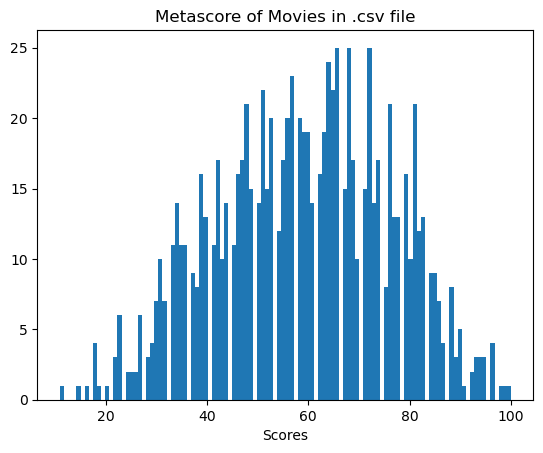

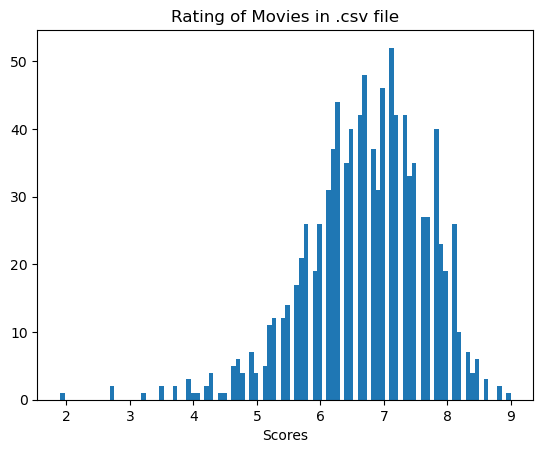

In [29]:
### START CODE HERE ###

plt.hist(dataset['Metascore'],bins=110)
plt.xlabel("Scores")
plt.title("Metascore of Movies in .csv file")
plt.figure()
plt.hist(dataset['Rating'],bins=100)
plt.xlabel("Scores")
plt.title("Rating of Movies in .csv file")
plt.show()

### END CODE HERE ###

## Correlations
>Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [14]:
### START CODE HERE ###
columns = ['Rating', 'Votes', 'Metascore']
dataset_subset_df = dataset[columns]

corr_matrix = dataset_subset_df.corr()
print(corr_matrix)
### END CODE HERE ###

             Rating     Votes  Metascore
Rating     1.000000  0.511537   0.631897
Votes      0.511537  1.000000   0.325684
Metascore  0.631897  0.325684   1.000000


# Question 3

## File
> Craet a .txt file and name it "Name_actors". You must write the name of all actors/actresses in the IMDB-Movie-Data.csv file. Don't write a name multiple time and write each name in a new line.

In [32]:
### START CODE HERE ###
dataset['Actors-new2'] = dataset['Actors'].str.split(',')

# Create a set to store the unique actors
unique_actors = set()

# Iterate over each row and add the actors to the set
for row in dataset['Actors-new2']:
    for actor in row:
        unique_actors.add(actor.strip()) # Use strip() to remove any whitespace around the actor's name

# Write the unique actors to a text file
with open('Name_actors.txt', 'w') as f:
    for actor in sorted(unique_actors):
        f.write(actor + '\n')

### END CODE HERE ###

# Question 4

## Plot
>You must plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
> set the x_label, y_label and title for your plot.

Text(0.5, 1.0, 'Number of Movies by Year')

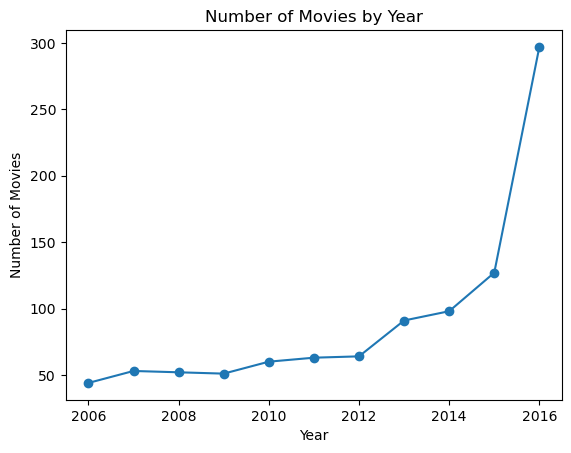

In [36]:
### START CODE HERE ###
movies_per_year = dataset['Year'].value_counts().sort_index()

plt.plot(movies_per_year.index, movies_per_year.values)
plt.scatter(movies_per_year.index, movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
### END CODE HERE ###

## Plot
>You must plot the cos(x) curve. plot 20 cycle of the curve. the frequency of first half of curve is 50 Hz and frequency of second lalf is 200 Hz. 
> set the x_label, y_label and title for your plot.

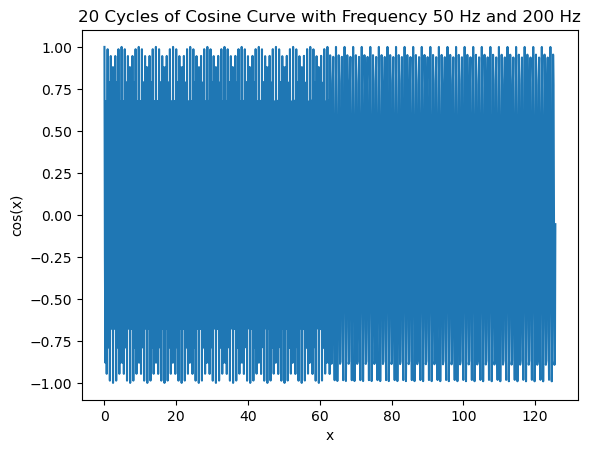

In [11]:
### START CODE HERE ###
x = np.linspace(0, 40*np.pi, 1000)
freq1 = 50
freq2 = 200

y = np.concatenate([np.cos(2*np.pi*freq1*x[:len(x)//2]), np.cos(2*np.pi*freq2*x[len(x)//2:])])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('20 Cycles of Cosine Curve with Frequency 50 Hz and 200 Hz')
### END CODE HERE ###